In [30]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import nsfg
import thinkstats2
import thinkplot

### Percentile & Percentile Rank

In [4]:
scores_data = [55, 66, 77, 88, 99]

In [1]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
            
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [5]:
PercentileRank(scores_data, 88)

80.0

In [3]:
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

In [6]:
Percentile(scores_data, 50)

77

In [7]:
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores) - 1) // 100

    return scores[index]

In [8]:
Percentile2(scores_data, 50)

77

### CDF
CDF: a function that maps from a value to its perfentile rank

In [9]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
            
    prob = count / len(sample)
    return prob

In [10]:
sample_data = [1, 2, 2, 3, 5]

CDF(0) = 0.0
CDF(1) = 0.2
CDF(2) = 0.6
CDF(3) = 0.8
CDF(4) = 0.8
CDF(5) = 1.0


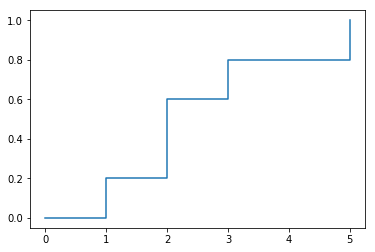

In [19]:
y_cdf = []
for i in range(6):
    y = EvalCdf(sample_data, i)
    y_cdf.append(y)
    print('CDF({}) ='.format(i), y)

plt.plot(list(range(6)), y_cdf, drawstyle='steps-post')
plt.show()

### Representing CDFs

In [22]:
preg = nsfg.ReadFemPreg(dct_file='data/2002FemPreg.dct', dat_file='data/2002FemPreg.dat.gz')
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

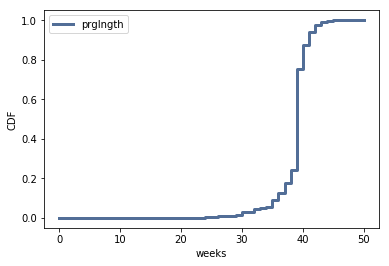

In [27]:
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='weeks', ylabel='CDF')

### Comparing CDFs

In [28]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

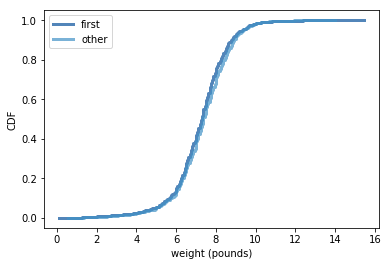

In [29]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Show(xlabel='weight (pounds)', ylabel='CDF')

### Random numbers

In [31]:
weights = live.totalwgt_lb
cdf = thinkstats2.Cdf(weights, label='totalwgt_lb')

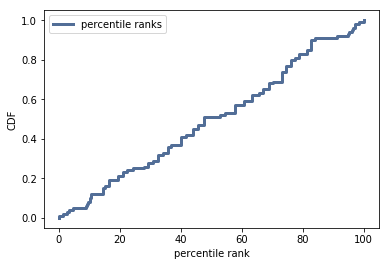

In [37]:
sample = np.random.choice(weights, 100, replace=True)
ranks = [cdf.PercentileRank(x) for x in sample]
rank_cdf = thinkstats2.Cdf(ranks)

thinkplot.Cdf(rank_cdf, label='percentile ranks')
thinkplot.Show(xlabel='percentile rank', ylabel='CDF')

CDF is an uniform distribution because of the way the CDF is defined.
Using this property, random numbers can be generated with a simple algorithm.

In [40]:
def Random(cdf):
    return cdf.Percentile(np.random.uniform(0, 100))

In [41]:
for i in range(5):
    print(Random(cdf))

8.875
1.75
6.625
7.8125
7.125


### Comparing percentile ranks

In [44]:
def PositionToPercentile(position, field_size):
    beat = field_size - position + 1
    percentile = 100.0 * beat / field_size
    
    return percentile

In [46]:
# 97th out of 1633
print(PositionToPercentile(97, 1633))

# 26th out of 256
print(PositionToPercentile(26, 256))

94.12124923453766
90.234375


In [47]:
def PercentileToPosition(percentile, field_size):
    beat = percentile * field_size / 100.0
    position = field_size - beat + 1
    
    return position

In [50]:
# If I want to be in the same percentile in this group compared to when I am in that group
PercentileToPosition(PositionToPercentile(26, 256), 171)

17.69921875

### Exercises

How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

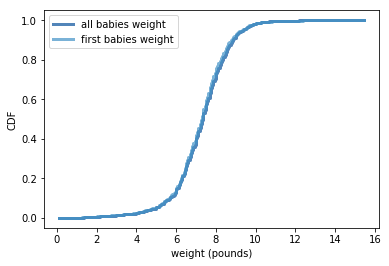

In [58]:
# 4kg -> 8.8lb
my_weight = 8.8
weight_cdf = thinkstats2.Cdf(live.totalwgt_lb, label='all babies weight')
first_weight_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first babies weight')

thinkplot.PrePlot(2)
thinkplot.Cdfs([weight_cdf, first_weight_cdf])
thinkplot.Show(xlabel='weight (pounds)', ylabel='CDF')

In [59]:
print(weight_cdf.PercentileRank(my_weight))
print(first_weight_cdf.PercentileRank(my_weight))

88.42664306262448
89.91519596607839


Almost sorry mom...

The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [61]:
num_data = np.random.random(1000)

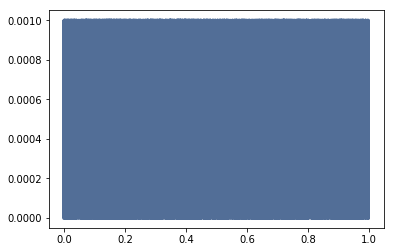

In [66]:
pmf = thinkstats2.Pmf(num_data)
thinkplot.Pmf(pmf)
thinkplot.Show()

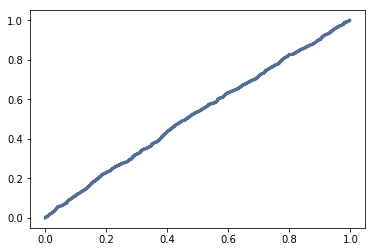

In [68]:
cdf = thinkstats2.Cdf(num_data)
thinkplot.Cdf(cdf)
thinkplot.Show()